In [4]:
# ex) 비온 날 세기
import numpy as np
import pandas as pd
rainfall = pd.read_csv('/Users/heogeonhyeock/Downloads/seattle2014.csv')['PRCP'].values
inches = rainfall / 254 # 1/10mm -> inches
inches.shape

(365,)

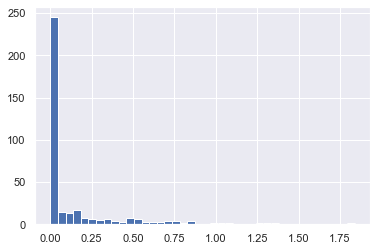

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.hist(inches, 40);

In [8]:
# ufunc으로서의 비교 연산자
x = np.array([1,2,3,4,5])
x < 3
(2 * x) == ( x ** 2)

"""
== : np.equal
!= : np.not_equal
<  : np.less
<= : np.less_equal
>  : np.greater
>= : np.greater_equal
"""

'\n== : np.equal\n!= : np.not_equal\n<  : np.less\n<= : np.less_equal\n>  : np.greater\n>= : np.greater_equal\n'

In [15]:
# 2차원에서의 비교 연산
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3,4))
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [20]:
# 부울 배열로 작업하기
print(x)
np.count_nonzero(x < 6) # 6보다 작은 값의 갯수
np.sum(x < 6) # True = 1 False = 0 으로 계산하므로 섬을 이용해서도 6보다 작은 값의 갯수를 구할 수 있다
np.sum(x < 6, axis = 1) # 행별로 6보다 작은 값의 갯수
np.all(x < 6, axis = 1) # 행별로 모든 값이 6보다 작은지에 대한 논리값

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


array([ True, False, False])

In [31]:
# 예제 비온 날 세기 , 부울 연산자
np.sum((inches > 0.5) & (inches < 1)) # inches 가 0.5와 1 사이의 값
np.sum(~(( inches <=0.5) | (inches >=1 ))) # 다른방법

"""
& : np.bitwise_and
| : np.bitwise_or
^ : np.bitwise_xor
~ : np.bitsiwse_not
"""

29

In [38]:
#마스크로서의 부울 배열
x < 5
x[x<5] # True 인 위치에 있는 모든 값

array([0, 3, 3, 3, 2, 4])

In [47]:
# 비가 온 모든 날에 대한 마스크 생성
rainy = (inches > 0)
# 여름에 해당하는 날에 대한 마스크 생성 , 6월 21일은 172번째 날
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)
np.median(inches[rainy]) # 비온날 강수량의 중앙값
np.median(inches[summer]) #여름중 강수량의 중앙값
np.max(inches[summer]) # 여름중 강수량의 최고값
np.median(inches[rainy & ~summer]) #여름이 아닐때 비온날 중 강수량의 중앙값

0.20078740157480315

In [ ]:
"""
and 와 or는 전체 객체에 대해 단일 부울 평가를 수행
& 와 | 는 객체의 내용에 대해 여러 번 부울 평가를 수행
부울 Numpy 배열에서는 대부분 후자를 선호
"""